# Sir Sly Lyrics


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.book import * 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
lyrics = pd.read_csv("sirsly_lyrics.csv")
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes


In [5]:
#We perform a few simple text cleaning tasks. We convert characters to lower case, eliminate the new lines, and drop all punctuation.

lyrics['clean text'] = (
    lyrics['Lyrics']
    .str.replace("\n", " ")
    .str.lower()
    .str.replace(r"[^a-z\s]", " ")
)
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video,clean text
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes,ah ah ah ah ah ah ah ah ah ah ah ah i was ...
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes,go ahead and stand up straight straight again...
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes,mouth is made of metal metal metal pocket f...
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes,i m selfish never didn t think about anyone b...
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes,i m running tired of this complex i was jeal...


We can then use sklearn to create a word vector for each song, which contains the counts of all words in its lyrics. By all words, we mean the set of all unique words used across all 26 songs. We can think of each word vector as a record so we have 26 records and thousands of variables (word counts).
We can try to examine the relationship between speeches by reducing the dimensionality of the data. We take an approach that is a kind of Principle Component Analysis for word vectors. Specifically, we measure the distance between songs via a metric on the word vectors.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
tfidf = vec.fit_transform(lyrics['clean text'])

In [7]:
np.random.seed(42)
import scipy as sp
(u, s, vt) = sp.sparse.linalg.svds(tfidf, k=2)

This gives us a 26 by 26 matrix of the distances between all pairs of speeches. Then we use SVD to decompose the matrix and plot the first two column vectors of the resulting decomposition (these are similar in nature to the first two principle components).

In [8]:
#df['Year'] = df['Date'].str[-4:].astype('int')
lyrics['x'] = u[:,0]
lyrics['y'] = u[:,1]
lyrics.head(26)

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video,clean text,x,y
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes,ah ah ah ah ah ah ah ah ah ah ah ah i was ...,-0.020049,0.155280
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes,go ahead and stand up straight straight again...,0.263933,0.198070
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes,mouth is made of metal metal metal pocket f...,0.089975,0.145100
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes,i m selfish never didn t think about anyone b...,0.326971,0.209575
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes,i m running tired of this complex i was jeal...,0.274546,0.260304
5,"Nowhere / Bloodlines, Pt. I",none,You Haunt Me,4:32,2014,9,16,"You woke me up in the middle of the night, Lit...",1610253,6,no,you woke me up in the middle of the night lit...,-0.061931,0.246006
6,Inferno,Lizzy Plapinger,You Haunt Me,2:49,2014,9,16,I think you clipped my wings to save me from t...,1803153,7,no,i think you clipped my wings to save me from t...,-0.170612,0.144381
7,Leave You,none,You Haunt Me,3:13,2014,9,16,When you’re standing at the start of what you ...,847486,8,no,when you re standing at the start of what you ...,0.133269,0.255785
8,Floods,none,You Haunt Me,3:32,2014,9,16,What the hell did I do wrong? Doesn't matter n...,713214,9,no,what the hell did i do wrong doesn t matter n...,0.142619,0.263543
9,Too Far Gone,none,You Haunt Me,3:27,2014,9,16,I'm stuck inside of these lines I drew. I didn...,2586086,10,no,i m stuck inside of these lines i drew i didn...,-0.173802,0.188622


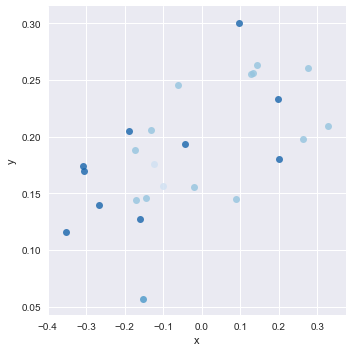

In [9]:
sns.lmplot(x = 'x', y = 'y', data = lyrics, hue='Year', legend=False, fit_reg=False, palette="Blues")

In [14]:
#!pip install plotly

In [11]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [12]:
colors = np.array(["rgba({0},{1},{2},1)".format(*c) for c in sns.color_palette("Blues", len(lyrics))])
colors[-1] = "rgba(.99,.5,.2,1.)"
py.iplot([go.Scatter(x = lyrics['x'], y = lyrics['y'], mode='markers', marker=dict(color=colors), text=lyrics['Title'])])

It appears that there are a few pairs of songs that have vector values close to another: 
    High & Change
    Leave You & The First Stone
    

**for changes/updates: **
    save, go to terminal. do git status. add file with git add. if its already there and updating, do git commit <file name>. vim will pop up. tap "i", enter a commit mesage. i.e. "added a period." Esc to exit out. then do :wq. that saves and quits. then type git push. 

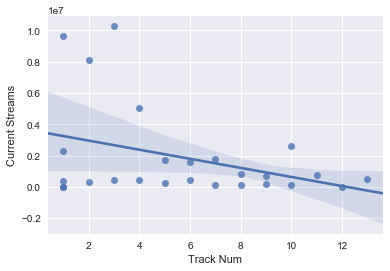

In [13]:
plt.figure()
#for_plotting = daily_counts
#for_plotting["Daily Count Casual Riders"] = for_plotting["casual"]
#for_plotting["Daily Count Registered Riders"] = for_plotting["registered"]

lyrics["Current Streams"].replace(("none"), (0), inplace=True)
lyrics["Current Streams"] = lyrics["Current Streams"].fillna(0)
lyrics["Current Streams"] = [int(lyrics["Current Streams"][i]) for i in np.arange(26)]
sns.regplot(x= "Track Num", y ="Current Streams", data=lyrics)

